In [ ]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
incidents_timing = pd.read_csv('state_date_level.csv')
gun_laws = pd.read_csv('gun_laws.csv')

# Hipotese 1

Estados do leste tendem a ter mais tiroteios em escolas

In [ ]:
def bootstrap_mean(df1, df2, column, n=10000):
    size1 = len(df1)
    size2 = len(df2)
    values1 = np.zeros(n)
    values2 = np.zeros(n)
    values_diff = np.zeros(n)
    for i in range(n):
        sample1 = df1[column].sample(size1, replace=True, random_state=i)
        sample2 = df2[column].sample(size2, replace=True, random_state=i*3)
        values1[i] = sample1.mean()
        values2[i] = sample2.mean()
        values_diff[i] = sample1.mean() - sample2.mean()
    return values1, values2, values_diff

In [ ]:
states = set(incidents_timing['State'])
states.remove("High")

east_states = ["Maine", "New Hampshire", "Vermont", "New York", "Massachusetts", "Rhode Island", "Connecticut", "New Jersey", "Pennsylvania", "Delaware", "Maryland", "District of Columbia", "Michigan", "Ohio", "Indiana", "Illinois", "Wisconsin", "West Virginia", "Virginia", "North Carolina", "Tennessee", "Kentucky", "South Carolina", "Georgia", "Alabama", "Mississippi", "Florida"]

yearly_incidents = incidents_timing.loc[incidents_timing['Date'].str.contains("2019-")]

incidents_by_state = []
state_region = list()

for state in states:
  incidents_by_state.append(len(yearly_incidents.loc[incidents_timing['State'].str.contains(state)]))
  if(state in east_states): state_region.append("EAST")
  else: state_region.append("OTHER")

In [ ]:
region_shootings = pd.DataFrame(
  {
    "state_region": state_region,
    "number_shootings": incidents_by_state
  })

east_region = region_shootings[region_shootings['state_region']=='EAST']
other_regions = region_shootings[region_shootings['state_region']=='OTHER']
col = 'number_shootings'
v_east_region, v_other_regions, v_diff = bootstrap_mean(east_region, other_regions, col)

bp_data = [v_east_region, v_other_regions]

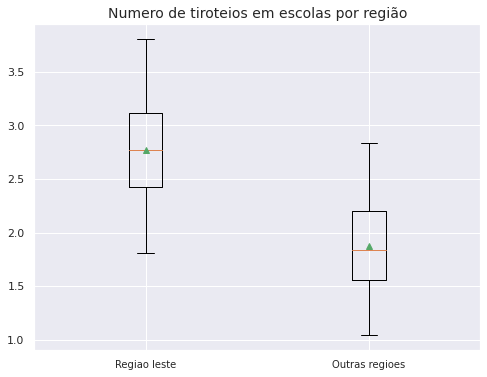

In [ ]:
plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['Regiao leste', 'Outras regioes'], fontsize=10)
plt.title('Numero de tiroteios em escolas por região', fontsize=14)
plt.show()

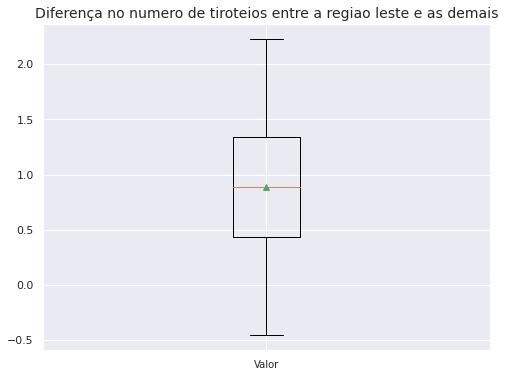

In [ ]:
plt.rcParams['figure.figsize']  = (8, 6)

plt.boxplot(v_diff, whis=[2.5, 97.5], showfliers=False, showmeans=True)
plt.xticks([1], ['Valor'], fontsize=10)
plt.title('Diferença no numero de tiroteios entre a regiao leste e as demais', fontsize=14)
plt.show()

# Hipotese 2

Estados com mais leis e restrições relacionadas ao controle de armas tem menos tiroteios

In [ ]:
current_gun_laws = gun_laws.loc[gun_laws['year'] == 2019]

has_many_laws = []
incidents_by_state = []
states = current_gun_laws['state']

for index, state in enumerate(states):
  state_label = "YES"
  if(list(current_gun_laws['lawtotal'])[index] < 20): state_label = "NO"
  has_many_laws.append(state_label)

for state in states: incidents_by_state.append(len(yearly_incidents.loc[incidents_timing['State'].str.contains(state)]))

In [ ]:
laws_counter = pd.DataFrame(
  {
    "states": states,
    "has_many_laws": has_many_laws,
    "number_shootings": incidents_by_state,
  })

many_laws = laws_counter[laws_counter['has_many_laws']=='YES']
few_laws = laws_counter[laws_counter['has_many_laws']=='NO']
col = 'number_shootings'
v_many_laws, v_few_laws, v_diff = bootstrap_mean(many_laws, few_laws, col)

bp_data = [v_many_laws, v_few_laws]

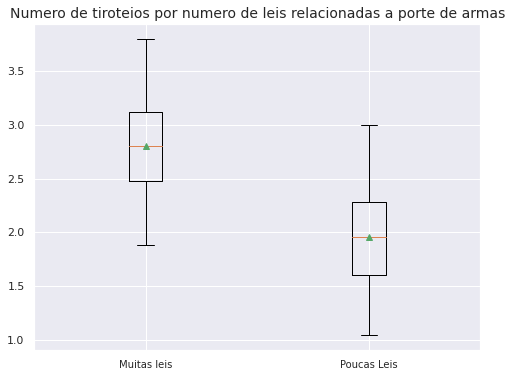

In [ ]:
plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['Muitas leis', 'Poucas Leis'], fontsize=10)
plt.title('Numero de tiroteios por numero de leis relacionadas a porte de armas', fontsize=14)
plt.show()

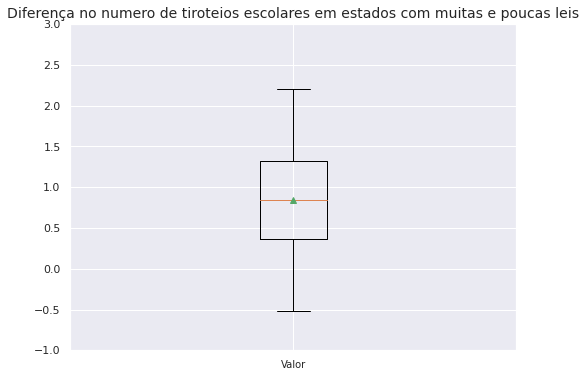

In [ ]:
plt.rcParams['figure.figsize']  = (8, 6)

plt.boxplot(v_diff, whis=[2.5, 97.5], showfliers=False, showmeans=True)
plt.xticks([1], ['Valor'], fontsize=10)
plt.ylim(-1, 3)
plt.title('Diferença no numero de tiroteios escolares em estados com muitas e poucas leis', fontsize=14)
plt.show()

# Hipotese 3

Estados com mais leis e restrições relacionadas a armas em escolas tem menos tiroteios

In [ ]:
current_gun_laws = gun_laws.loc[gun_laws['year'] == 2019]

school_related_laws = ['collegeconcealed','elementary','opencarryh','opencarryl','opencarrypermith','opencarrypermitl','cap14', 'cap16', 'capaccess', 'capuses', 'dvro']

has_many_laws = []
states_law_counter = current_gun_laws['college']

for law in school_related_laws:
  states_law_counter = np.add(states_law_counter, current_gun_laws[law])

college_concealed = []
for law_counter in states_law_counter:
  state_label = "YES"
  if(law_counter < 7): state_label = "NO"
  has_many_laws.append(state_label)

In [ ]:
laws_counter['has_many_laws'] = has_many_laws

many_laws = laws_counter[laws_counter['has_many_laws']=='YES']
few_laws = laws_counter[laws_counter['has_many_laws']=='NO']
col = 'number_shootings'

v_many_laws, v_few_laws, v_diff = bootstrap_mean(many_laws, few_laws, col)
bp_data = [v_many_laws, v_few_laws]

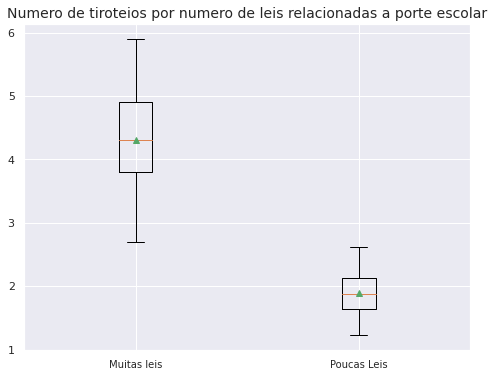

In [ ]:
plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['Muitas leis', 'Poucas Leis'], fontsize=10)
plt.title('Numero de tiroteios por numero de leis relacionadas a porte escolar', fontsize=14)
plt.show()

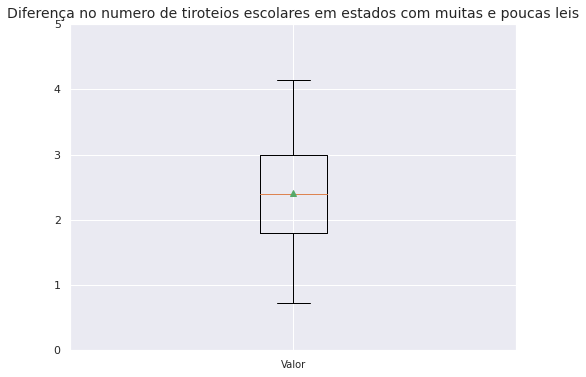

In [ ]:
plt.rcParams['figure.figsize']  = (8, 6)

plt.boxplot(v_diff, whis=[2.5, 97.5], showfliers=False, showmeans=True)
plt.xticks([1], ['Valor'], fontsize=10)
plt.ylim(0, 5)
plt.title('Diferença no numero de tiroteios escolares em estados com muitas e poucas leis', fontsize=14)
plt.show()

# IC do numero de incidentes

Qual o intervalo de confiança do numero de incidentes de estados com poucas leis comparado ao IC de locais com muitas leis?

In [ ]:
def bootstrap_mean(data):
  number_shootings = pd.DataFrame(data, columns = ['number_shootings'])
  values = np.zeros(5000)

  for i in range(5000):
    sample = number_shootings.sample(len(number_shootings), replace=True, random_state=i)
    values[i] = sample['number_shootings'].mean()
  percentiles = np.percentile(values, [2.5, 97.5])

  return (percentiles[0], percentiles[1])

In [ ]:
(LI, LS) = bootstrap_mean(few_laws)
print(f"Intervalo de confiança do numero de incidentes para poucas leis: {LI.round(1)}, {LS.round(1)}")

(LI, LS) = bootstrap_mean(many_laws)
print(f"Intervalo de confiança do numero de incidentes para muitas leis: {LI}, {LS}")

Intervalo de confiança do numero de incidentes para poucas leis: 1.2, 2.6
Intervalo de confiança do numero de incidentes para muitas leis: 2.7, 5.9
